In this project we build a model to detect fraudulent credit card transactions. For this purpose I have downloaded a dataset from https://www.kaggle.com/mlg-ulb/creditcardfraud. The data has 31 variables out of which 28 of them are independent anonimised variables $V1, V2, \cdots, V28$ and the rest of them are time of transaction, amount of transaction and whether or not the transaction is a fraud or not. A fraudulent transaction is denoted as '0' and a legitimate transaction is denoted as '1'. 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

cc = pd.read_csv('creditcard.csv')
print(cc.shape)
print(cc.groupby(['Class']).size())
cc.tail(20)

(284807, 31)
Class
0    284315
1       492
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284787,172769.0,-1.029719,-1.110670,-0.636179,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,...,0.353722,0.488487,0.293632,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0
284788,172770.0,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
284790,172771.0,-0.515513,0.971950,-1.014580,-0.677037,0.912430,-0.316187,0.396137,0.532364,-0.224606,...,-0.280302,-0.849919,0.300245,0.000607,-0.376379,0.128660,-0.015205,-0.021486,9.81,0
284791,172774.0,-0.863506,0.874701,0.420358,-0.530365,0.356561,-1.046238,0.757051,0.230473,-0.506856,...,-0.108846,-0.480820,-0.074513,-0.003988,-0.113149,0.280378,-0.077310,0.023079,20.32,0
284792,172774.0,-0.724123,1.485216,-1.132218,-0.607190,0.709499,-0.482638,0.548393,0.343003,-0.226323,...,0.414621,1.307511,-0.059545,0.242669,-0.665424,-0.269869,-0.170579,-0.030692,3.99,0
284793,172775.0,1.971002,-0.699067,-1.697541,-0.617643,1.718797,3.911336,-1.259306,1.056209,1.315006,...,0.188758,0.694418,0.163002,0.726365,-0.058282,-0.191813,0.061858,-0.043716,4.99,0
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0


So the data set contains 284807 transaction and 492 of them are actually fraudulent. Clearly the number of fraud transactions are much less. 

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


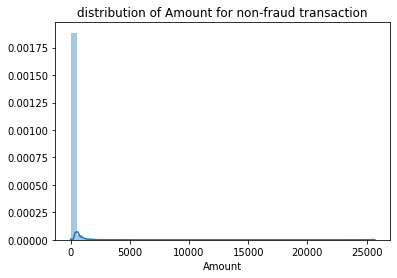

In [2]:
cond_legit = (cc['Class'] == 0)
cc_1 = cc[cond_legit]
sns.distplot(cc_1['Amount'])
plt.xlabel
plt.title('distribution of Amount for non-fraud transaction')
cc_1.loc[:,['Amount']].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


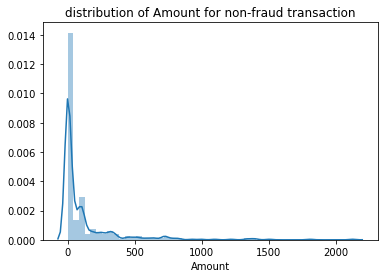

In [3]:
cond_legit = (cc['Class'] == 1)
cc_1 = cc[cond_legit]
sns.distplot(cc_1['Amount'])
plt.xlabel
plt.title('distribution of Amount for non-fraud transaction')
cc_1.loc[:,['Amount']].describe()

The distribution of the transaction amount for non-fraud and frauds clearly indicate the fraud transaction have comparatively high amount. We normalise the 'Amount' column. We also remove the 'Time' column as this is similar to serial number of the transactions. 

In [4]:
cc_2 = cc.copy()
from sklearn.preprocessing import StandardScaler

cc_new = StandardScaler().fit_transform(cc_2[['Amount']])
cc_list = [item for sublist in cc_new.tolist() for item in sublist]
cc_new = pd.Series(cc_list)
cc_2 = pd.concat([cc_2, cc_new.rename('ScaledAmount')], axis=1)

cc_new = StandardScaler().fit_transform(cc_2[['Time']])
cc_list = [item for sublist in cc_new.tolist() for item in sublist]
cc_new = pd.Series(cc_list)
cc_2 = pd.concat([cc_2, cc_new.rename('ScaledTime')], axis=1)

cc_2.drop(['Amount', 'Time', 'ScaledTime'], axis=1, inplace=True)
cc_2.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount
269376,-1.149626,0.290100,0.800955,-0.874896,0.104407,-0.196375,0.291360,0.340235,0.125264,-0.347661,...,-0.178369,-0.436627,0.200716,-0.504903,-0.830790,0.146447,-0.023386,-0.083270,0,-0.101470
158558,-0.047067,1.185354,0.052263,0.864272,1.587851,-0.072806,1.327893,-0.370286,0.622953,0.034035,...,-0.087930,0.451570,-0.423540,-0.853346,0.031887,-0.412668,0.243234,-0.003976,0,-0.345593
270915,-0.733319,1.601833,-1.253605,-0.660401,0.502782,0.126090,-0.709196,-2.040238,-0.534946,-1.348731,...,-1.539987,-0.489216,0.332146,0.124638,-0.487416,0.106293,0.053451,0.039653,0,-0.317127
88963,-4.888568,-3.631597,1.017981,1.114435,-0.807058,1.287679,1.187842,0.175227,0.557638,-0.541891,...,-0.670578,0.223860,1.320173,-0.176618,0.439324,0.505475,0.148806,-0.231144,0,1.716060
32530,1.179727,-0.100842,0.687627,-0.179965,-0.623829,-0.346247,-0.360820,0.087821,0.072248,-0.097781,...,-0.036674,-0.083762,0.133864,0.282423,-0.003343,0.903395,-0.056057,-0.001259,0,-0.337877


In [50]:
cc_data_new = cc_2.copy()
X = cc_data_new.drop('Class', axis=1)
y = cc_data_new['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

from sklearn.metrics import auc
from sklearn.metrics import roc_curve

# Entropy 

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
dtree.fit(X_train,y_train)

#metrics for the test data 
print('Metrics for the test data \n')
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_test,predictions)
print('Confusion matrix :\n',conf_matrix)
accuracy=accuracy_score(y_test,predictions)
print('Prediction accuracy :\n',accuracy)
print('Classification report :\n', classification_report(y_test,predictions))

#metrics for the train data 
print('Metrics for the train data \n')
predictions = dtree.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_train,predictions)
print('Confusion matrix :\n',conf_matrix)
accuracy=accuracy_score(y_train,predictions)
print('Prediction accuracy :\n',accuracy)
print('Classification property :\n',classification_report(y_train,predictions))

Metrics for the test data 

Confusion matrix :
 [[56852    14]
 [   28    68]]
Prediction accuracy :
 0.9992626663389628
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.83      0.71      0.76        96

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Metrics for the train data 

Confusion matrix :
 [[227436     13]
 [    72    324]]
Prediction accuracy :
 0.9996269393666747
Classification property :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.96      0.82      0.88       396

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845



In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

Accuracies :
 [0.99934167 0.99951723 0.9992539  0.999605   0.99951723 0.99938556
 0.9995611  0.9995611  0.99947331 0.9994294 ]
Model_accuracy :
 0.9994645488448711
Model_standard_accuracy :
 0.00010533040211414862


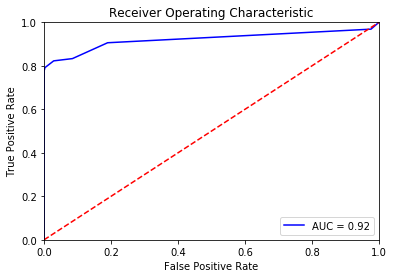

In [73]:
fpr, tpr, threshold = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gini

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth = 3)
dtree.fit(X_train,y_train)

#metrics for the test data 
print('Metrics for the test data \n')
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_test,predictions)
print('Confusion matrix :\n',conf_matrix)
accuracy=accuracy_score(y_test,predictions)
print('Prediction accuracy :\n',accuracy)
print('Classification report :\n', classification_report(y_test,predictions))

#metrics for the train data 
print('Metrics for the train data \n')
predictions = dtree.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_train,predictions)
print('Confusion matrix :\n',conf_matrix)
accuracy=accuracy_score(y_train,predictions)
print('Prediction accuracy :\n',accuracy)
print('Classification property :\n',classification_report(y_train,predictions))

Metrics for the test data 

Confusion matrix :
 [[56848    18]
 [   37    59]]
Prediction accuracy :
 0.9990344440153085
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.61      0.68        96

    accuracy                           1.00     56962
   macro avg       0.88      0.81      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Metrics for the train data 

Confusion matrix :
 [[227419     30]
 [   104    292]]
Prediction accuracy :
 0.9994118808839343
Classification property :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.91      0.74      0.81       396

    accuracy                           1.00    227845
   macro avg       0.95      0.87      0.91    227845
weighted avg       1.00      1.00      1.00    227845



In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

Accuracies :
 [0.99929778 0.99934167 0.9992539  0.9992539  0.99947334 0.99912223
 0.99929775 0.99951721 0.9995611  0.99938551]
Model_accuracy :
 0.9993504373362601
Model_standard_accuracy :
 0.00012840062659716383


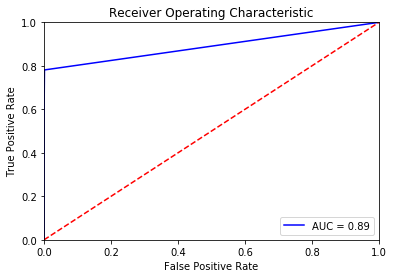

In [71]:
fpr, tpr, threshold = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

To write comment about ginni and entropy here

# Random Forest 

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

[[56860     6]
 [   29    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.92      0.70      0.79        96

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962

0.999385555282469


In [11]:
rfc_pred = rfc.predict(X_train)
print(confusion_matrix(y_train, rfc_pred))
print(classification_report(y_train, rfc_pred))
print(accuracy_score(y_train, rfc_pred))

[[227448      1]
 [     9    387]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      0.98      0.99       396

    accuracy                           1.00    227845
   macro avg       1.00      0.99      0.99    227845
weighted avg       1.00      1.00      1.00    227845

0.9999561105137265


In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

Accuracies :
 [0.99964889 0.99964889 0.99951723 0.99951723 0.99951723 0.99942945
 0.99951721 0.99964888 0.99960499 0.99956108]
Model_accuracy :
 0.9995611055221414
Model_standard_accuracy :
 7.07664458042615e-05


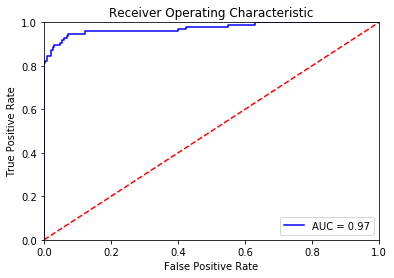

In [65]:
fpr, tpr, threshold = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost

In [12]:
from xgboost import XGBClassifier 
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [13]:
y_pred = xgbmodel.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[56852    14]
 [   23    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

0.9993504441557529


In [14]:
y_pred = xgbmodel.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[227436     13]
 [    59    337]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.96      0.85      0.90       396

    accuracy                           1.00    227845
   macro avg       0.98      0.93      0.95    227845
weighted avg       1.00      1.00      1.00    227845

0.9996839956988304


In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgbmodel, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

Accuracies :
 [0.99942945 0.99964889 0.99934167 0.99956111 0.99956111 0.99942945
 0.99951721 0.9995611  0.99951721 0.99947329]
Model_accuracy :
 0.9995040489009813
Model_standard_accuracy :
 8.338791153249806e-05


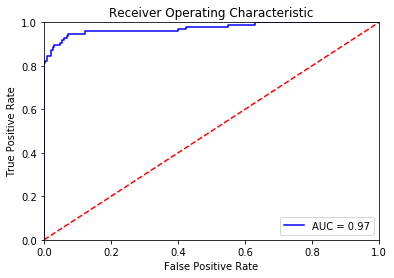

In [66]:
fpr, tpr, threshold = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
log_reg.coef_

array([[ 0.14856494, -0.08384178,  0.00203156,  0.63191114,  0.05838297,
        -0.09860339, -0.12855298, -0.17779686, -0.41213227, -0.75226802,
        -0.06648447,  0.00123967, -0.31906216, -0.60484817, -0.09815505,
        -0.15191871, -0.07257693, -0.02749208,  0.11695737, -0.42860065,
         0.34012478,  0.41643243, -0.05285706,  0.03775967, -0.08546627,
        -0.08825064, -0.75056135, -0.2745752 ,  0.15841556]])

In [17]:
log_reg.intercept_

array([-8.46551773])

In [18]:
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[56849    17]
 [   38    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.60      0.68        96

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962

0.9990344440153085


In [19]:
y_pred = log_reg.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[227422     27]
 [   127    269]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.91      0.68      0.78       396

    accuracy                           1.00    227845
   macro avg       0.95      0.84      0.89    227845
weighted avg       1.00      1.00      1.00    227845

0.9993241019113871


In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_reg, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracies :
 [0.99938556 0.99947334 0.99912223 0.99929778 0.99934167 0.99916612
 0.99920997 0.99938553 0.99929775 0.99925383]
Model_accuracy :
 0.9992933789814249
Model_standard_accuracy :
 0.00010283687822386742


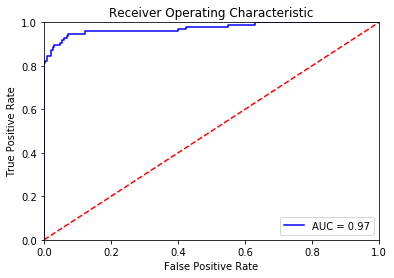

In [67]:
fpr, tpr, threshold = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [28]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[56848    18]
 [   30    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.69      0.73        96

    accuracy                           1.00     56962
   macro avg       0.89      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962

0.9991573329588147


In [30]:
y_pred = knn.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[227427     22]
 [    91    305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.93      0.77      0.84       396

    accuracy                           1.00    227845
   macro avg       0.97      0.89      0.92    227845
weighted avg       1.00      1.00      1.00    227845

0.9995040488051088


In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

Accuracies :
 [0.99942945 0.99956111 0.99929778 0.99956111 0.99942945 0.99934167
 0.99960499 0.99951721 0.99947331 0.99938551]
Model_accuracy :
 0.9994601596072815
Model_standard_accuracy :
 9.625504752891523e-05


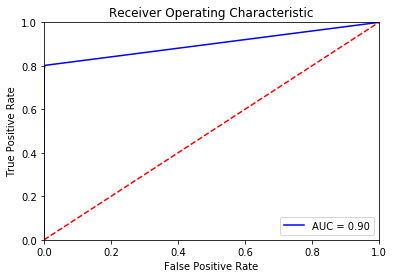

In [68]:
fpr, tpr, threshold = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Baysian 

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb = gnb.fit(X_train, y_train)

In [46]:
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[55581  1285]
 [   19    77]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.80      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962

0.9771075453811313


In [35]:
y_pred = nb.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[222610   4839]
 [    65    331]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227449
           1       0.06      0.84      0.12       396

    accuracy                           0.98    227845
   macro avg       0.53      0.91      0.55    227845
weighted avg       1.00      0.98      0.99    227845

0.9784765959314446


In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

Accuracies :
 [0.97836296 0.97809963 0.97788018 0.97853851 0.97823129 0.97739741
 0.98007374 0.97963483 0.97928371 0.97779046]
Model_accuracy :
 0.9785292717717397
Model_standard_accuracy :
 0.0008201346202763634


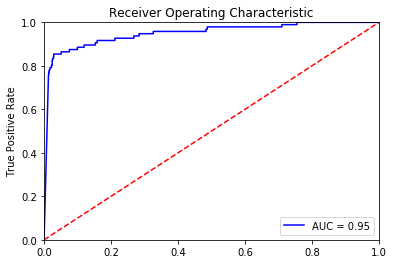

In [58]:
fpr, tpr, threshold = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.show()

We used different supervised machine learning algorithm for the classification problem at hand. However due to the existence of the larger number of the non-fraud transactions in the data set the accuracies are almost one for the non-fraud transaction and as result the 'precision' and 'recall' score for the train data almost always lead to indicate overfitting. 

In order to try to avoid this problem, we randomly sample a fraction of data into a subset. We then count the number of fraud transaction in this subset. After this we randomly sample an equal number non-fraud transaction from the subset. With this we make a new data set consisting of equal number of non-fraud and fraud data set. 

With this new data we apply the previously used supervised machine learning algorithms. 

In [80]:
cc_3 = cc_2.sample(frac = 0.8)
print(cc_3.groupby(['Class']).size())

Class
0    227429
1       417
dtype: int64
417


In [83]:
no_of_frauds = cc_3.Class.value_counts()[1]
print(no_of_frauds)
legit = cc_3[cc_3['Class'] == 0]
fraud = cc_3[cc_3['Class'] == 1]
print(legit.shape)
print(fraud.shape)

legit_1 = legit.sample(no_of_frauds)
cc_4 = pd.concat([legit_1, fraud])
cc_4.tail()
cc_4 = cc_4.sample(frac=1).reset_index(drop=True)
cc_4.head(10)

417
(227429, 30)
(417, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount
0,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,...,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,1,-0.322924
1,-1.465912,-0.625603,1.444164,1.625029,0.697957,-0.765448,0.625764,-0.027929,-0.936358,-0.285418,...,0.219407,0.021448,0.707376,0.369690,-0.298749,-0.465103,0.074235,0.194207,0,0.490647
2,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1,-0.349231
3,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,-2.248115,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,1,1.568731
4,0.924375,-2.191736,0.474865,-0.937601,-1.959718,0.225338,-1.070480,0.062366,-1.242294,1.232832,...,-0.099345,-0.227077,-0.322902,0.024145,0.438769,-0.114752,0.009005,0.053425,0,0.773951
5,-1.426459,2.235644,-2.481917,-1.465647,0.867112,-0.707921,0.509424,1.041128,-0.877969,-0.391677,...,0.311237,0.821713,-0.162346,-0.081465,0.002237,0.102319,0.225596,0.193267,0,-0.350191
6,-3.975216,0.581573,-1.880372,4.319241,-3.024330,1.240793,-1.909559,0.660718,-2.752611,-3.550385,...,0.578984,1.397311,1.045322,-0.304000,0.005295,0.235435,0.962015,-0.673557,1,1.465180
7,-0.668126,0.218955,0.415721,-0.510760,1.035266,-0.516112,1.423702,-0.885727,0.617030,0.928700,...,-0.246642,-0.171031,0.124716,-0.362392,-1.044976,0.084725,-1.039493,-0.294840,0,-0.267231
8,-0.571655,1.652070,-1.054045,1.022518,1.192671,-0.448657,0.930418,0.405205,-1.068361,-0.656688,...,0.124778,0.435301,-0.217227,0.575167,0.016525,-0.424208,0.320406,0.196143,0,-0.296736
9,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,...,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,1,0.910406


In [84]:
print(cc_4.groupby(['Class']).size())

Class
0    417
1    417
dtype: int64


In [96]:
Q1 = cc_4.quantile(0.25)
Q3 = cc_4.quantile(0.75)
IQR = Q3 - Q1

cc_5 = cc_4[~((cc_4 < (Q1 - 1.5 * IQR)) |(cc_4 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(cc_5.groupby(['Class']).size())

#print(cc_data_new.shape)
#print(cc_data_new.groupby(['Class']).size())

Class
0    314
1    140
dtype: int64


In [97]:
cc_reduced = cc_5.copy()
X = cc_reduced.drop('Class', axis=1)
y = cc_reduced['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

from sklearn.metrics import auc
from sklearn.metrics import roc_curve

# Entropy

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtree_ent = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
dtree_ent.fit(X_train,y_train)

#metrics for the test data 
print('Metrics for the test data \n')
predictions = dtree_ent.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_test,predictions)
print('Confusion matrix :\n',conf_matrix)
accuracy=accuracy_score(y_test,predictions)
print('Prediction accuracy :\n',accuracy)
print('Classification report :\n', classification_report(y_test,predictions))

#metrics for the train data 
print('Metrics for the train data \n')
predictions = dtree_ent.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_train,predictions)
print('Confusion matrix :\n',conf_matrix)
accuracy=accuracy_score(y_train,predictions)
print('Prediction accuracy :\n',accuracy)
print('Classification property :\n',classification_report(y_train,predictions))

Metrics for the test data 

Confusion matrix :
 [[55  7]
 [ 4 25]]
Prediction accuracy :
 0.8791208791208791
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        62
           1       0.78      0.86      0.82        29

    accuracy                           0.88        91
   macro avg       0.86      0.87      0.86        91
weighted avg       0.88      0.88      0.88        91

Metrics for the train data 

Confusion matrix :
 [[250   2]
 [  3 108]]
Prediction accuracy :
 0.9862258953168044
Classification property :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       252
           1       0.98      0.97      0.98       111

    accuracy                           0.99       363
   macro avg       0.98      0.98      0.98       363
weighted avg       0.99      0.99      0.99       363



Accuracies :
 [0.92105263 0.89189189 0.97222222 0.94444444 0.88888889 0.94444444
 0.88888889 0.97222222 0.86111111 1.        ]
Model_accuracy :
 0.9285166745693061
Model_standard_accuracy :
 0.04303361794831631


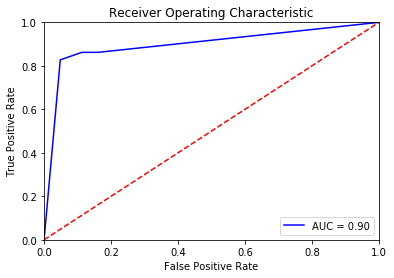

In [101]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree_ent, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

fpr, tpr, threshold = roc_curve(y_test, dtree_ent.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gini 

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtree_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3)
dtree_gini.fit(X_train,y_train)

#metrics for the test data 
print('Metrics for the test data \n')
predictions = dtree_gini.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_test,predictions)
print('Confusion matrix :\n',conf_matrix)
accuracy=accuracy_score(y_test,predictions)
print('Prediction accuracy :\n',accuracy)
print('Classification report :\n', classification_report(y_test,predictions))

#metrics for the train data 
print('Metrics for the train data \n')
predictions = dtree_gini.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
conf_matrix=confusion_matrix(y_train,predictions)
print('Confusion matrix :\n',conf_matrix)
accuracy=accuracy_score(y_train,predictions)
print('Prediction accuracy :\n',accuracy)
print('Classification property :\n',classification_report(y_train,predictions))

Metrics for the test data 

Confusion matrix :
 [[59  3]
 [ 5 24]]
Prediction accuracy :
 0.9120879120879121
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.94        62
           1       0.89      0.83      0.86        29

    accuracy                           0.91        91
   macro avg       0.91      0.89      0.90        91
weighted avg       0.91      0.91      0.91        91

Metrics for the train data 

Confusion matrix :
 [[251   1]
 [ 10 101]]
Prediction accuracy :
 0.9696969696969697
Classification property :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       252
           1       0.99      0.91      0.95       111

    accuracy                           0.97       363
   macro avg       0.98      0.95      0.96       363
weighted avg       0.97      0.97      0.97       363



Accuracies :
 [0.92105263 0.89189189 0.97222222 0.94444444 0.88888889 0.91666667
 0.91666667 1.         0.94444444 1.        ]
Model_accuracy :
 0.9396277856804172
Model_standard_accuracy :
 0.038276650515041824


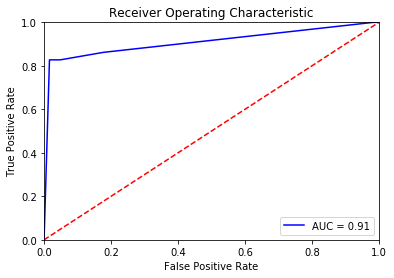

In [103]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtree_gini, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

fpr, tpr, threshold = roc_curve(y_test, dtree_gini.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

[[62  0]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        62
           1       1.00      0.83      0.91        29

    accuracy                           0.95        91
   macro avg       0.96      0.91      0.93        91
weighted avg       0.95      0.95      0.94        91

0.945054945054945
[[252   0]
 [  3 108]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       252
           1       1.00      0.97      0.99       111

    accuracy                           0.99       363
   macro avg       0.99      0.99      0.99       363
weighted avg       0.99      0.99      0.99       363

0.9917355371900827
Accuracies :
 [0.92105263 0.89189189 0.97222222 0.97222222 0.88888889 0.94444444
 0.88888889 0.91666667 0.97222222 1.        ]
Model_accuracy :
 0.9368500079026394
Model_standard_accuracy :
 0.03883023568997991


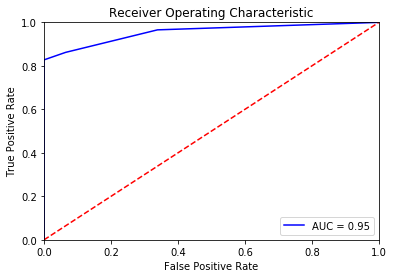

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

rfc_pred = rfc.predict(X_train)
print(confusion_matrix(y_train, rfc_pred))
print(classification_report(y_train, rfc_pred))
print(accuracy_score(y_train, rfc_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)


fpr, tpr, threshold = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost

[[61  1]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        62
           1       0.96      0.83      0.89        29

    accuracy                           0.93        91
   macro avg       0.94      0.91      0.92        91
weighted avg       0.94      0.93      0.93        91

0.9340659340659341
[[252   0]
 [  0 111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       111

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363

1.0
Accuracies :
 [0.92105263 0.91891892 0.97222222 0.97222222 0.88888889 0.94444444
 0.91666667 1.         0.97222222 0.97222222]
Model_accuracy :
 0.9478860439386754
Model_standard_accuracy :
 0.03333338790047097


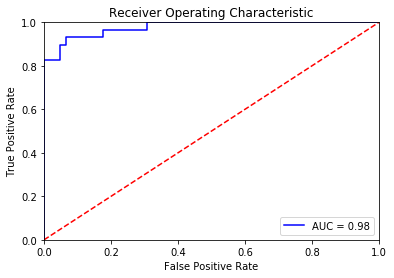

In [107]:
from xgboost import XGBClassifier 
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)

y_pred = xgbmodel.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

y_pred = xgbmodel.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgbmodel, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

fpr, tpr, threshold = roc_curve(y_test, xgbmodel.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[[60  2]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        62
           1       0.92      0.83      0.87        29

    accuracy                           0.92        91
   macro avg       0.92      0.90      0.91        91
weighted avg       0.92      0.92      0.92        91

0.9230769230769231
[[249   3]
 [ 12  99]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       252
           1       0.97      0.89      0.93       111

    accuracy                           0.96       363
   macro avg       0.96      0.94      0.95       363
weighted avg       0.96      0.96      0.96       363

0.9586776859504132
Accuracies :
 [0.92105263 0.91891892 0.97222222 0.94444444 0.94444444 0.94444444
 0.88888889 1.         0.97222222 0.94444444]
Model_accuracy :
 0.9451082661608977
Model_standard_accuracy :
 0.029850246485569245


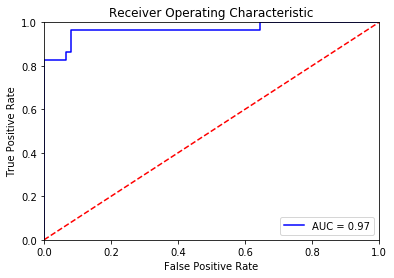

In [118]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

y_pred = log_reg.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_reg, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

fpr, tpr, threshold = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN

[[61  1]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        62
           1       0.96      0.83      0.89        29

    accuracy                           0.93        91
   macro avg       0.94      0.91      0.92        91
weighted avg       0.94      0.93      0.93        91

0.9340659340659341
[[252   0]
 [ 17  94]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       252
           1       1.00      0.85      0.92       111

    accuracy                           0.95       363
   macro avg       0.97      0.92      0.94       363
weighted avg       0.96      0.95      0.95       363

0.953168044077135
Accuracies :
 [0.92105263 0.91891892 0.97222222 0.97222222 0.88888889 0.97222222
 0.97222222 0.97222222 0.94444444 1.        ]
Model_accuracy :
 0.9534415994942311
Model_standard_accuracy :
 0.032280188305089774


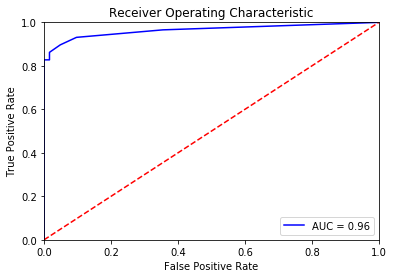

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

y_pred = knn.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

fpr, tpr, threshold = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# GaussianNB


[[61  1]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        62
           1       0.96      0.83      0.89        29

    accuracy                           0.93        91
   macro avg       0.94      0.91      0.92        91
weighted avg       0.94      0.93      0.93        91

0.9340659340659341
[[247   5]
 [ 20  91]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       252
           1       0.95      0.82      0.88       111

    accuracy                           0.93       363
   macro avg       0.94      0.90      0.92       363
weighted avg       0.93      0.93      0.93       363

0.931129476584022
Accuracies :
 [0.86842105 0.91891892 0.94444444 0.94444444 0.88888889 0.91666667
 0.94444444 0.97222222 0.91666667 0.94444444]
Model_accuracy :
 0.9259562193772719
Model_standard_accuracy :
 0.02900723782548714


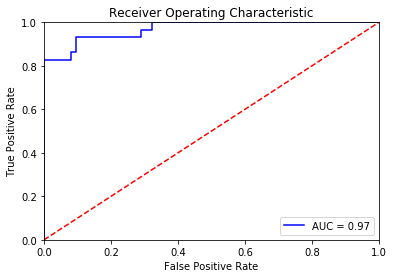

In [117]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb = gnb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

y_pred = nb.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

print('Accuracies :\n', accuracies)
print('Model_accuracy :\n', model_accuracy)
print('Model_standard_accuracy :\n', model_standard_deviation)

fpr, tpr, threshold = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We have complied the results for the entire data set and the reduced data. For the reduced data set we find that the 'Precision' and 'Recall' from the train data set indicate that overfitting is reduced for the Logistic regression and the GaussianNB. The cross validation score of these two model also justifies the fitting of these models, specially the Logistic Regression model. The high value of AUC also indicate that the logistic regression and the GaussianNB are better model to predict the fraud and non-fraud transactions. 